https://github.com/Bot-Academy/NeuralNetworkFromScratch/blob/master/nn.py

In [ ]:
!pip install pandas matplotlib numpy

In [7]:
import numpy as np
import os

def get_mnist():
    with np.load(f"{os.path.dirname(os.path.abspath('__file__'))}/data/mnist.npz") as f:
        images, labels = f["x_train"], f["y_train"]
    images = images.astype("float32") / 255
    images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
    # labels = #np.eye(10)[labels]
    return images, labels


In [8]:
images, labels = get_mnist()
print(images.T.shape)
print(labels.shape)

(784, 60000)
(60000,)


w = weights, b = bias, i = input, h = hidden, o = output, l = label
e.g. w_i_h = weights from input layer to hidden layer

In [5]:
w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_i_h = np.zeros((20, 1))
b_h_o = np.zeros((10, 1))

learn_rate = 0.01
nr_correct = 0
epochs = 3

k_err = [0]

def train():
    global w_i_h, w_h_o, b_i_h, b_h_o, nr_correct, k_err
    for epoch in range(epochs):
        for index, (img, l) in enumerate(zip(images, labels)):

            img.shape += (1,)
            l.shape += (1,)

            # Forward propagation input -> hidden
            h_pre = b_i_h + w_i_h @ img
            h = 1 / (1 + np.exp(-h_pre))
            
            # Forward propagation hidden -> output
            o_pre = b_h_o + w_h_o @ h
            o = 1 / (1 + np.exp(-o_pre))

            # Cost / Error calculation
            e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
            if np.argmax(o) != np.argmax(l):
                k_err[-1] += 1
                if(index % 100 == 0):
                    k_err.append(1)
                # print(f"Index: {index}, Label: {np.argmax(l)}")
                # print(f"Error: {e}")
                # print(f"Prediction: {np.argmax(o)}")
                # print(f"Output: {o}")
            nr_correct += int(np.argmax(o) == np.argmax(l))

            # Backpropagation output -> hidden (cost function derivative)
            delta_o = o - l
            w_h_o += -learn_rate * delta_o @ np.transpose(h)
            b_h_o += -learn_rate * delta_o
            # Backpropagation hidden -> input (activation function derivative)
            delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
            w_i_h += -learn_rate * delta_h @ np.transpose(img)
            b_i_h += -learn_rate * delta_h

        # Show accuracy for this epoch
        print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
        nr_correct = 0


In [6]:
import matplotlib.pyplot as plt

def test_prediction():
  index = int(input("Enter a number (0 - 59999): "))
  img = images[index]
  print(img.shape)
  plt.imshow(img.reshape(28, 28), cmap="Greys")

  img.shape += (1,)
  # Forward propagation input -> hidden
  h_pre = b_i_h + w_i_h @ img.reshape(784, 1)

  h = 1 / (1 + np.exp(-h_pre))

  # Forward propagation hidden -> output
  o_pre = b_h_o + w_h_o @ h
  o = 1 / (1 + np.exp(-o_pre))


  plt.title(f"Index: {index} \nLabel: {labels[index].argmax()} \nPrediction: {o.argmax()}")
  plt.show()

(784,)


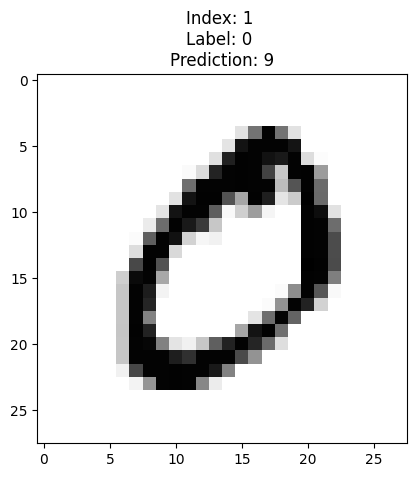

In [7]:
test_prediction()

In [8]:
train()

Acc: 85.89%
Acc: 92.45%
Acc: 93.55%


(784,)


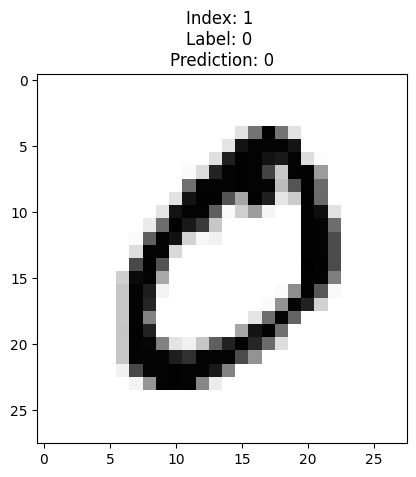

In [9]:
test_prediction()